In [25]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform.generator import FDomainCBCGenerator, FDomainDetFrameGenerator

In [26]:
fz = 102.0
df = 1
da = 0.1
dphi = 1.047
fref = 100.0
N = int((1024.0) * 4*8.0)+1
freqs = np.linspace(0., 1024., N)

dpsi = 0.5 * (np.tanh((freqs - fz)/df) - np.tanh((fref - fz)/df))*dphi
damp = np.exp(0.5*da*((np.tanh((freqs - fz)/df))**2 - (np.tanh((fref - fz)/df))**2))
corr = damp*(2.0 + 1j*dpsi) / (2.0 - 1j*dpsi)

tobs = 8*4
samprate = 4096.
f_low = 10.0
approximant = 'IMRPhenomD'
mass1 = 36
mass2 = 29
spin1z = 0.0
spin2z = 0.0
tc = 1186302519.7573993
ra = 1.37
dec = -1.26
polarization = 2.76
dist = 450.0

In [27]:
generator = FDomainCBCGenerator(variable_args=['mass1', 'mass2', 'spin1z', 'spin2z', 'tc', 'ra', 'dec', 
                                               'polarization', 'distance'], delta_f=1./tobs, f_lower=f_low,
                                               approximant=approximant)

In [28]:
hp, hc = generator.generate(mass1=mass1, mass2=mass2, spin1z=spin1z, spin2z=spin2z, tc=tc, ra=ra, dec=dec,
                            polarization=polarization, distance=dist)

(10.0, 1024.0)

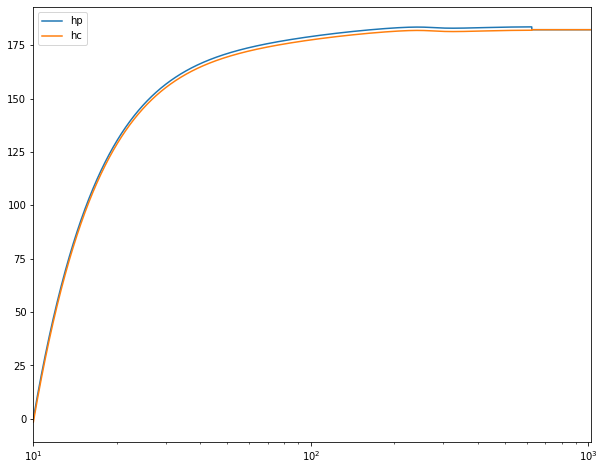

In [29]:
plt.figure(figsize=(10,8))
plt.semilogx(hp.sample_frequencies, np.unwrap(np.angle(hp)), label='hp')
plt.semilogx(hc.sample_frequencies, np.unwrap(np.angle(hc)), label='hc')
plt.legend()
plt.xlim(10., 1024.)

In [30]:
modhp, modhc =  generator.generate(mass1=mass1, mass2=mass2, spin1z=spin1z, spin2z=spin2z, tc=tc, ra=ra, dec=dec,
                            polarization=polarization, distance=dist)
modhp.data *= corr
modhc.data *= corr

(10.0, 1024.0)

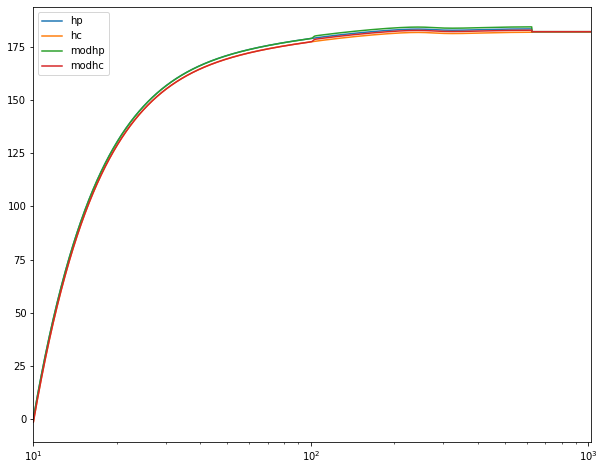

In [31]:
plt.figure(figsize=(10,8))
plt.semilogx(hp.sample_frequencies, np.unwrap(np.angle(hp)), label='hp')
plt.semilogx(hc.sample_frequencies, np.unwrap(np.angle(hc)), label='hc')
plt.semilogx(modhp.sample_frequencies, np.unwrap(np.angle(modhp)), label='modhp')
plt.semilogx(modhc.sample_frequencies, np.unwrap(np.angle(modhc)), label='modhc')
plt.legend()
plt.xlim(10., 1024.)

(10.0, 1024.0)

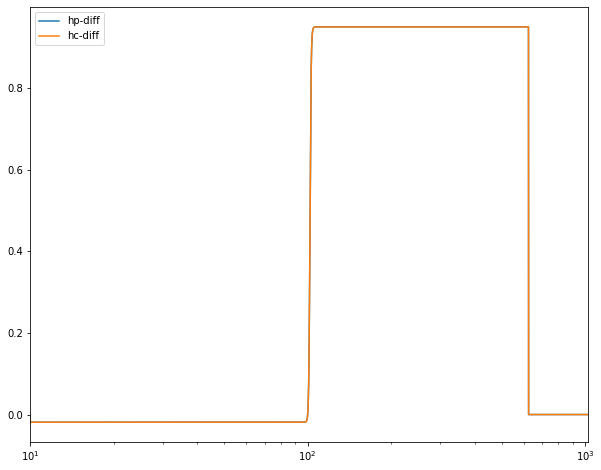

In [32]:
plt.figure(figsize=(10,8))
plt.semilogx(hp.sample_frequencies, np.unwrap(np.angle(modhp)) - np.unwrap(np.angle(hp)), label='hp-diff')
plt.semilogx(hc.sample_frequencies, np.unwrap(np.angle(modhc)) - np.unwrap(np.angle(hc)), label='hc-diff')
plt.legend()
plt.xlim(10., 1024.)

In [33]:
det_generator = FDomainDetFrameGenerator(FDomainCBCGenerator, tc, variable_args=['mass1', 'mass2', 'spin1z', 'spin2z',
                                                                             'tc', 'ra', 'dec', 'polarization',
                                                                             'distance'], detectors=['H1', 'L1'],
                                     delta_f=1./tobs, f_lower=f_low, approximant=approximant)

In [34]:
dtilde = det_generator.generate(mass1=mass1, mass2=mass2, spin1z=spin1z, spin2z=spin2z, tc=tc, ra=ra, dec=dec,
                            polarization=polarization, distance=dist)
dmodtilde = det_generator.generate(mass1=mass1, mass2=mass2, spin1z=spin1z, spin2z=spin2z, tc=tc, ra=ra, dec=dec,
                            polarization=polarization, distance=dist)
dmodtilde['H1'].data *= corr
dmodtilde['L1'].data *= corr

(10.0, 1024.0)

/home/bedelman/.virtualenvs/gw-postprocessing/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/bedelman/.virtualenvs/gw-postprocessing/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


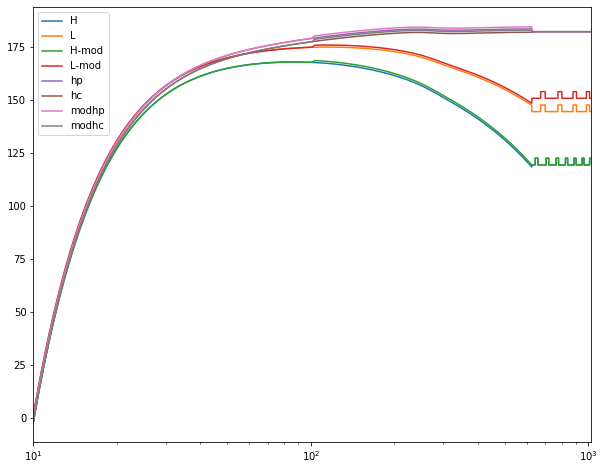

In [35]:
plt.figure(figsize=(10,8))
plt.semilogx(dtilde['H1'].sample_frequencies, np.unwrap(np.angle(dtilde['H1'])), label='H')
plt.semilogx(dtilde['L1'].sample_frequencies, np.unwrap(np.angle(dtilde['L1'])), label='L')
plt.semilogx(dmodtilde['H1'].sample_frequencies, np.unwrap(np.angle(dmodtilde['H1'])), label='H-mod')
plt.semilogx(dmodtilde['L1'].sample_frequencies, np.unwrap(np.angle(dmodtilde['L1'])), label='L-mod')
plt.semilogx(hp.sample_frequencies, np.unwrap(np.angle(hp)), label='hp')
plt.semilogx(hc.sample_frequencies, np.unwrap(np.angle(hc)), label='hc')
plt.semilogx(modhp.sample_frequencies, np.unwrap(np.angle(modhp)), label='modhp')
plt.semilogx(modhc.sample_frequencies, np.unwrap(np.angle(modhc)), label='modhc')
plt.legend()
plt.xlim(10., 1024.)

In [36]:
from pycbc.detector import Detector
from pycbc.waveform.utils import apply_fd_time_shift

In [37]:
H1 = Detector('H1')
L1 = Detector('L1')
fph, fch = H1.antenna_pattern(ra, dec, polarization, tc)
fpl, fcl = L1.antenna_pattern(ra, dec, polarization, tc)
hh = hp*fph + hc*fch
hl = hp*fpl + hc*fcl

(10.0, 512.0)

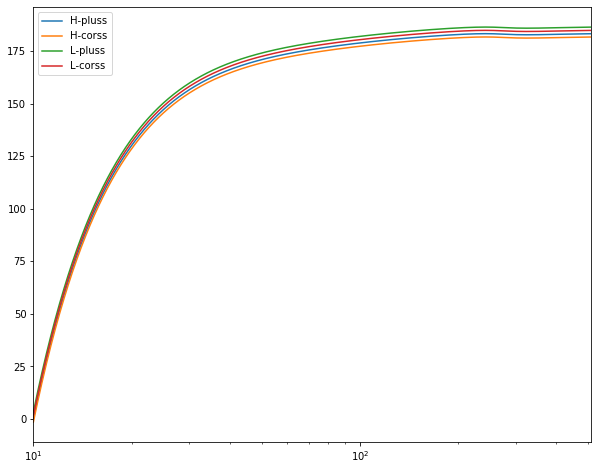

In [38]:
plt.figure(figsize=(10,8))
plt.semilogx(hp.sample_frequencies, np.unwrap(np.angle(hp*fph)), label='H-pluss')
plt.semilogx(hc.sample_frequencies, np.unwrap(np.angle(hc*fch)), label='H-corss')
plt.semilogx(hp.sample_frequencies, np.unwrap(np.angle(hp*fpl)), label='L-pluss')
plt.semilogx(hc.sample_frequencies, np.unwrap(np.angle(hc*fcl)), label='L-corss')
plt.legend()
plt.xlim(10., 512.)

(10.0, 512.0)

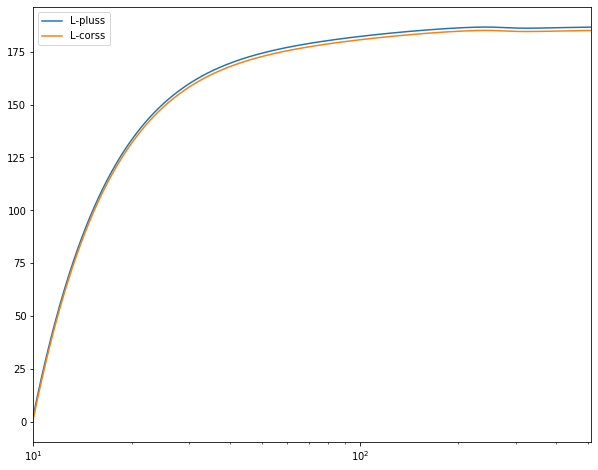

In [39]:
plt.figure(figsize=(10,8))
plt.semilogx(hp.sample_frequencies, np.unwrap(np.angle(hp*fpl)), label='L-pluss')
plt.semilogx(hc.sample_frequencies, np.unwrap(np.angle(hc*fcl)), label='L-corss')
plt.legend()
plt.xlim(10., 512.)

(10.0, 512.0)

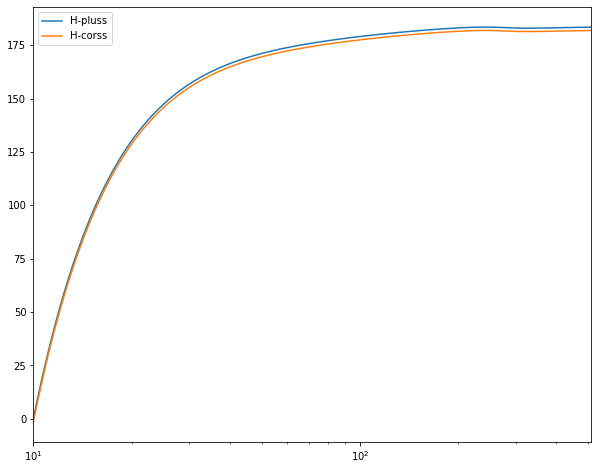

In [40]:
plt.figure(figsize=(10,8))
plt.semilogx(hp.sample_frequencies, np.unwrap(np.angle(hp*fph)), label='H-pluss')
plt.semilogx(hc.sample_frequencies, np.unwrap(np.angle(hc*fch)), label='H-corss')
plt.legend()
plt.xlim(10., 512.)

In [41]:
h = {}
tch = tc + H1.time_delay_from_earth_center(ra, dec, tc)
tcl = tc + L1.time_delay_from_earth_center(ra, dec, tc)
h['H1'] = apply_fd_time_shift(hh, tch, copy=False)
h['L1'] = apply_fd_time_shift(hl, tcl, copy=False)
hmod = {}
hmod['H1'] = h['H1'].copy()
hmod['L1'] = h['L1'].copy()
hmod['H1'].data *= corr
hmod['L1'].data *= corr

(10.0, 512.0)

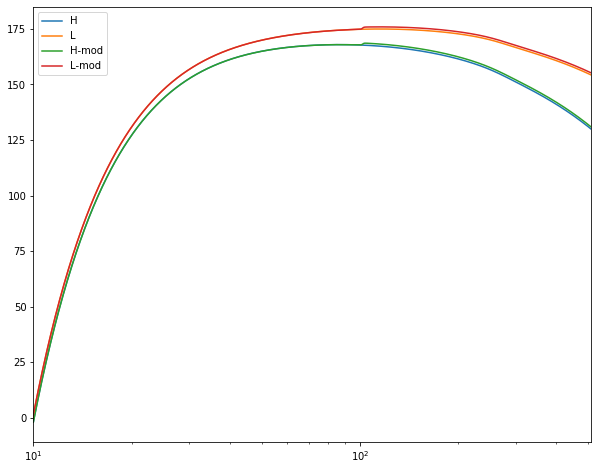

In [42]:
plt.figure(figsize=(10,8))
plt.semilogx(dtilde['H1'].sample_frequencies, np.unwrap(np.angle(dtilde['H1'])), label='H')
plt.semilogx(dtilde['L1'].sample_frequencies, np.unwrap(np.angle(dtilde['L1'])), label='L')
plt.semilogx(dmodtilde['H1'].sample_frequencies, np.unwrap(np.angle(dmodtilde['H1'])), label='H-mod')
plt.semilogx(dmodtilde['L1'].sample_frequencies, np.unwrap(np.angle(dmodtilde['L1'])), label='L-mod')
plt.legend()
plt.xlim(10., 512.)

In [43]:
ts = dtilde['H1'].to_timeseries()

In [44]:
ts.sample_times[0]

1186302519.7573993

In [45]:
ts.sample_times[-1]

1186302551.756911

(10.0, 512.0)

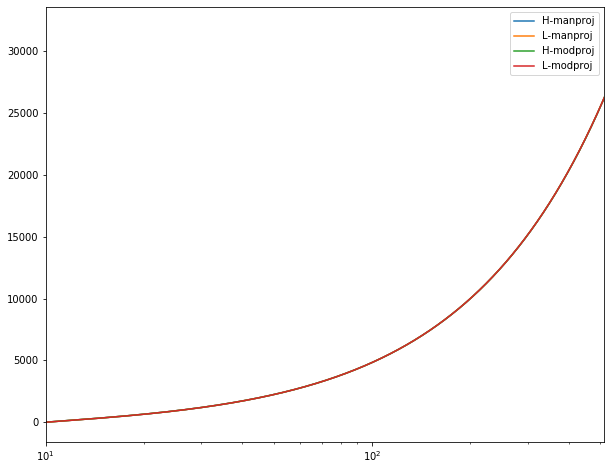

In [46]:
plt.figure(figsize=(10,8))
plt.semilogx(h['H1'].sample_frequencies, np.unwrap(np.angle(h['H1'])), label='H-manproj')
plt.semilogx(h['L1'].sample_frequencies, np.unwrap(np.angle(h['L1'])), label='L-manproj')
plt.semilogx(hmod['H1'].sample_frequencies, np.unwrap(np.angle(hmod['H1'])), label='H-modproj')
plt.semilogx(hmod['L1'].sample_frequencies, np.unwrap(np.angle(hmod['L1'])), label='L-modproj')
plt.legend()
plt.xlim(10., 512.)

In [47]:
from pycbc.frame import read_frame

In [48]:
ts = read_frame('/home/bedelman/PycharmProjects/sigsplinepostproc/scratch/flow_10/IMRPhenomD/H-H1_ModGR_Farr_FD-.gwf', 'H1_modGR')

RuntimeError: Internal function call failed: Invalid argument